DORNA

In [26]:
import numpy as np
LLAMA_RES = np.load(f'er_dorna_response.npy',allow_pickle=True)
print(len(LLAMA_RES))
clean_data = []
for index,item in enumerate(LLAMA_RES):
    t = item['tweet']
    l = item['label']
    r = item['response']

    if 'HATE' in r:
        r = 'HATE'
    elif 'HAPPY' in r:
        r = 'HAPPY'
    elif 'SURPRISE' in r:
        r = 'SURPRISE'
    elif 'FEAR' in r:
        r = 'FEAR'
    elif 'SAD' in r:
        r = 'SAD'
    elif 'ANGRY' in r:
        r = 'ANGRY'
    else :
        r = 'OTHER' 

    clean_data.append({'tweet': t, 'label': l, 'response':r})
np.save(f'ER_clean_DORNA.npy', np.array(clean_data, dtype=object))

1152


In [3]:
import numpy as np
dorna = np.load(f'ER_clean_DORNA.npy',allow_pickle=True)
dorna[4]

{'tweet': 'امشب گفت نامزدی دوستش که ادم روشنفکری است بهم خورده و دختر بشدت نگران حرف مردم گفتم وای به مردم روشنفکرمون که نگران مردمند پس تقصیری بر مادر حاشیه من نیست که بعد از یکسال و درگوشی درمورد تجاوز به دخترش حرف میزنه و ترس از ابرو داره #زنان_را_بشنوید',
 'label': 'SAD',
 'response': 'ANGRY'}

In [4]:
dorna_true_labels = []
dorna_predicted_lebels = []
for item in dorna:
    dorna_true_labels.append(item['label'])
    dorna_predicted_lebels.append(item['response'])

In [29]:
unique_values= np.unique(dorna_true_labels, return_inverse=True)
unique_values

(array(['ANGRY', 'FEAR', 'HAPPY', 'HATE', 'OTHER', 'SAD', 'SURPRISE'],
       dtype='<U8'),
 array([5, 2, 4, ..., 0, 5, 5], dtype=int64))

In [30]:
unique_values= np.unique(dorna_predicted_lebels, return_inverse=True)
unique_values

(array(['ANGRY', 'FEAR', 'HAPPY', 'HATE', 'OTHER', 'SAD', 'SURPRISE'],
       dtype='<U8'),
 array([0, 5, 3, ..., 0, 0, 4], dtype=int64))

In [31]:
from sklearn.metrics import f1_score

# Calculate Macro F1-score
macro_f1 = f1_score(dorna_true_labels, dorna_predicted_lebels, average='macro')

print(f'Macro F1-score: {macro_f1}')

Macro F1-score: 0.43918972158619024


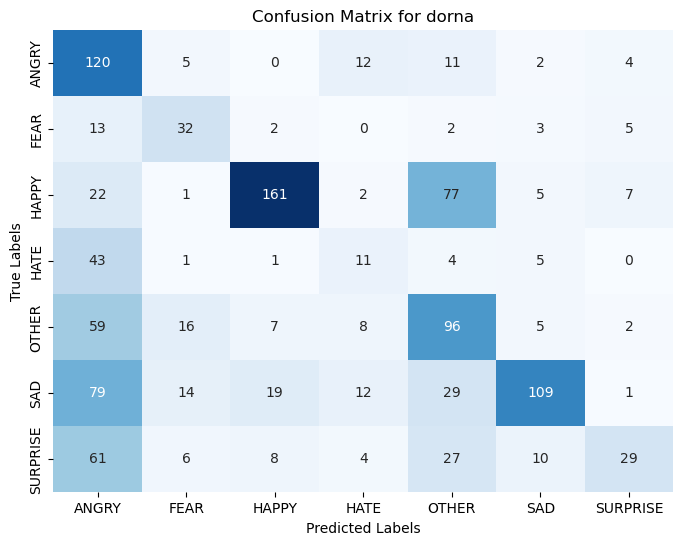

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_confusion_matrix(true_labels, predicted_labels , filename):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['ANGRY', 'FEAR', 'HAPPY', 'HATE', 'OTHER', 'SAD', 'SURPRISE'], yticklabels=['ANGRY', 'FEAR', 'HAPPY', 'HATE', 'OTHER', 'SAD', 'SURPRISE'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(filename)
    plt.savefig(filename)
    plt.show()

plot_confusion_matrix(dorna_true_labels, dorna_predicted_lebels , 'Confusion Matrix for dorna')

LLAMA3

In [11]:
import numpy as np
LLAMA_RES = np.load(f'ER_clean_LLAMA3.npy',allow_pickle=True)
print(len(LLAMA_RES))
clean_data = []
for index,item in enumerate(LLAMA_RES):
    t = item['tweet']
    l = item['label']
    r = item['response']

    if 'HATE' in r:
        r = 'HATE'
    elif 'HAPPY' in r:
        r = 'HAPPY'
    elif 'SURPRISE' in r:
        r = 'SURPRISE'
    elif 'FEAR' in r:
        r = 'FEAR'
    elif 'SAD' in r:
        r = 'SAD'
    elif 'ANGRY' in r:
        r = 'ANGRY'
    else :
        r = 'OTHER' 

    clean_data.append({'tweet': t, 'label': l, 'response':r})
np.save(f'ER_clean_LLAMA3.npy', np.array(clean_data, dtype=object))

1152


In [8]:
import numpy as np
LLAMA = np.load(f'ER_clean_LLAMA3.npy',allow_pickle=True)
LLAMA[4]

{'tweet': 'امشب گفت نامزدی دوستش که ادم روشنفکری است بهم خورده و دختر بشدت نگران حرف مردم گفتم وای به مردم روشنفکرمون که نگران مردمند پس تقصیری بر مادر حاشیه من نیست که بعد از یکسال و درگوشی درمورد تجاوز به دخترش حرف میزنه و ترس از ابرو داره #زنان_را_بشنوید',
 'label': 'SAD',
 'response': 'FEAR'}

In [9]:
llama_true_labels = []
llama_predicted_lebels = []
for item in LLAMA:
    llama_true_labels.append(item['label'])
    llama_predicted_lebels.append(item['response'])

In [14]:
unique_values= np.unique(llama_true_labels, return_inverse=True)
unique_values

(array(['ANGRY', 'FEAR', 'HAPPY', 'HATE', 'OTHER', 'SAD', 'SURPRISE'],
       dtype='<U8'),
 array([5, 2, 4, ..., 0, 5, 5], dtype=int64))

In [15]:
unique_values= np.unique(llama_predicted_lebels, return_inverse=True)
unique_values

(array(['ANGRY', 'FEAR', 'HAPPY', 'HATE', 'OTHER', 'SAD', 'SURPRISE'],
       dtype='<U8'),
 array([0, 5, 3, ..., 0, 0, 4], dtype=int64))

In [16]:
from sklearn.metrics import f1_score

# Calculate Macro F1-score
macro_f1 = f1_score(llama_true_labels, llama_predicted_lebels, average='macro')

print(f'Macro F1-score: {macro_f1}')

Macro F1-score: 0.4384476268076715


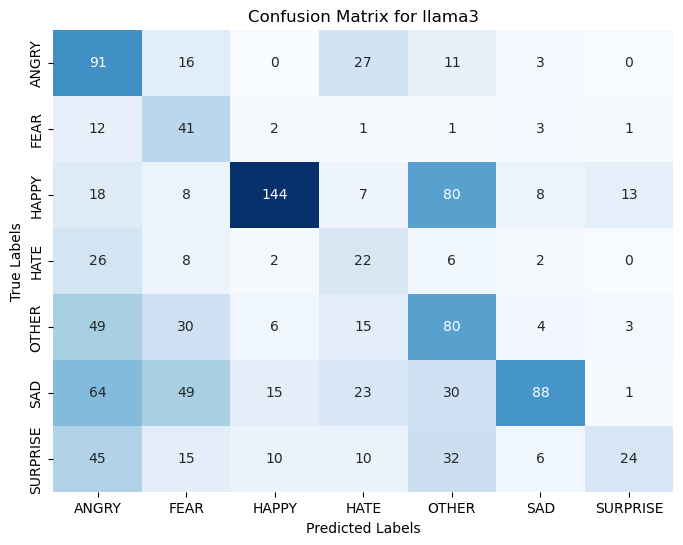

In [10]:
plot_confusion_matrix(llama_true_labels, llama_predicted_lebels , 'Confusion Matrix for llama3')